In [1]:
#https://en.wikipedia.org/wiki/Template_matching
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
full = cv2.imread('course material/DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

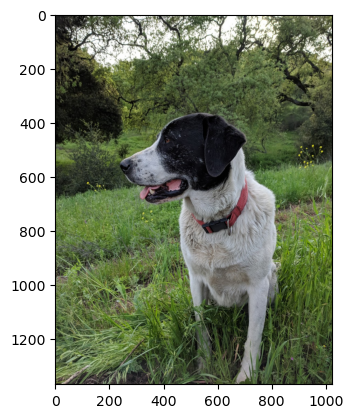

In [3]:
plt.imshow(full)

In [4]:
face = cv2.imread('course material/DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

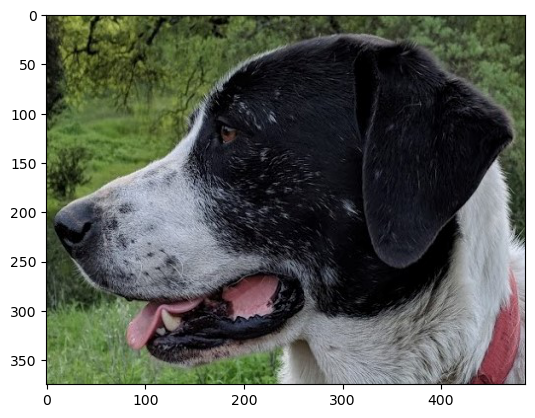

In [5]:
plt.imshow(face)

In [7]:
face.shape

(375, 486, 3)

In [8]:
full.shape

(1367, 1025, 3)

In [9]:
sum([1,2,3])

6

In [1]:
mystring = 'sum' #not make sense, because it is a string
mystring([1,2,3])

TypeError: 'str' object is not callable

In [11]:
eval(mystring) #in evaluate python will try understand the string as a function, so it could be executed

<function sum(iterable, /, start=0)>

In [13]:
myfunc = eval(mystring)

In [15]:
myfunc([1,2,3]) #now i can use the function with was as string on startup

6

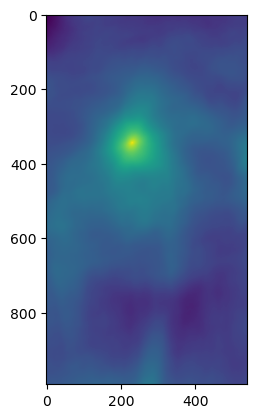

In [19]:
my_method = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full, face, my_method)
plt.imshow(res) #it shows a heat map to show where it thinks the image is

In [16]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

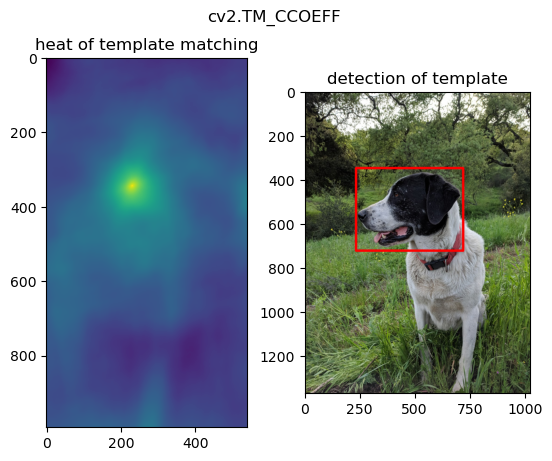

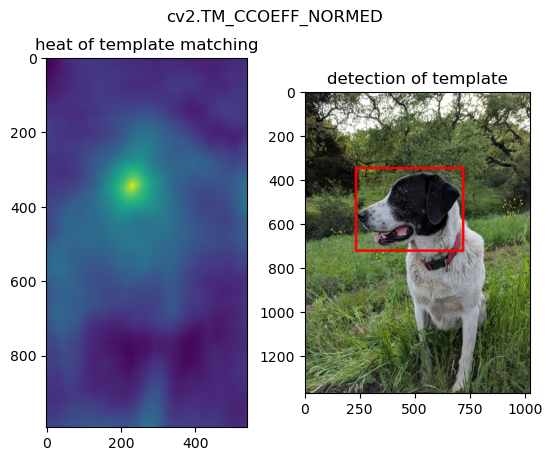

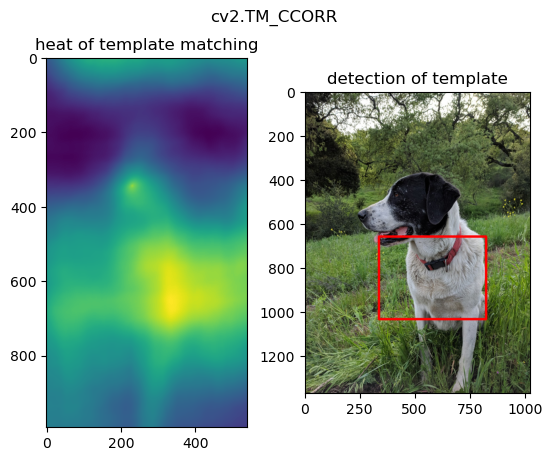

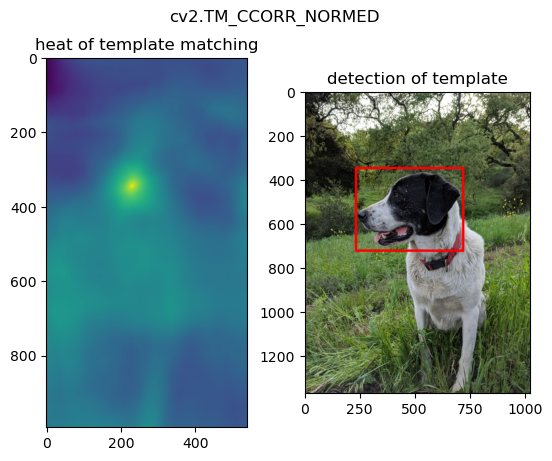

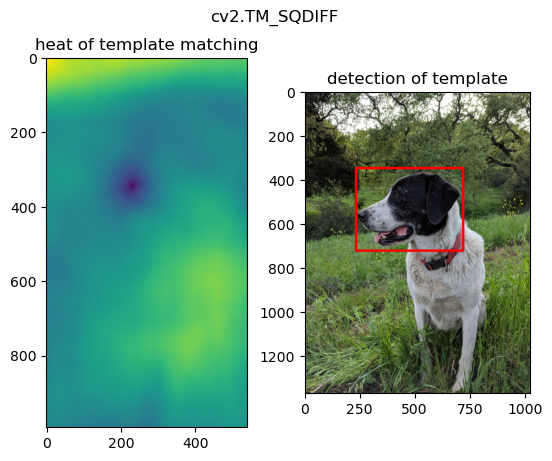

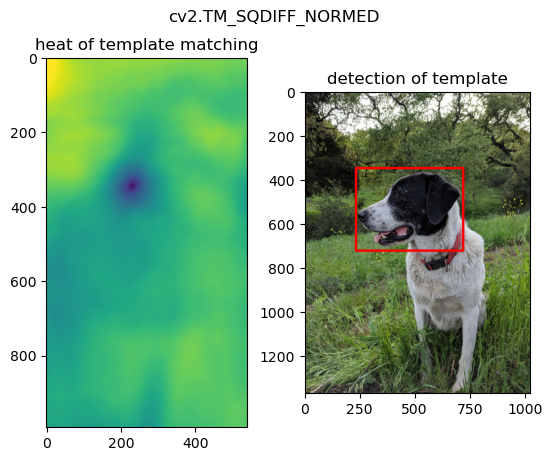

In [22]:
for m in methods:
    #create a copy of the image
    full_copy = full.copy()

    method = eval(m)

    #template matching
    res = cv2.matchTemplate(full_copy, face, method)

    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc # (y,x)
    else:
        top_left = max_loc

    height, width, channels = face.shape

    bottom_right = (top_left[0]+width, top_left[1]+height)

    cv2.rectangle(full_copy, top_left, bottom_right, (255,0,0), 10)

    #plt and show the images
    plt.subplot(121) #1 line, 2 columns, positon 1
    plt.imshow(res)
    plt.title('heat of template matching')

    plt.subplot(122) #1 line, 2 columns, positon 2
    plt.imshow(full_copy)
    plt.title('detection of template')

    #title with the method used
    plt.suptitle(m)

    plt.show() #add one more line to not plot over before
    print('\n')
    print('\n')
    